In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
data = pd.read_csv("credit_card_clustering.csv")

In [100]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Exploratory Data Analysis

In [101]:
data.shape

(8950, 18)

### Total Customers: 8950

In [102]:
data['CUST_ID'].nunique()

8950

### Descriptive Statistics

In [103]:
data['TENURE'].value_counts()

12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: TENURE, dtype: int64

Majority of the customers are old customers (high tenure: 12)

### Purchase Transactions Distribution of Customers


In [104]:
data['PURCHASES_TRX'].describe(np.arange(0.1, 1, 0.1))

count    8950.000000
mean       14.709832
std        24.857649
min         0.000000
10%         0.000000
20%         0.000000
30%         1.000000
40%         4.000000
50%         7.000000
60%        11.000000
70%        13.000000
80%        22.000000
90%        37.000000
max       358.000000
Name: PURCHASES_TRX, dtype: float64

The balance ranges from 0 to 358 and has a mean of 14

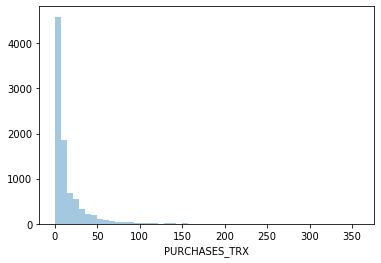

In [105]:
sns.distplot(data['PURCHASES_TRX'], kde=False)

### Purchase Distribution of Customers

In [106]:
data['PURCHASES'].describe(np.arange(0.1, 1, 0.1))

count     8950.000000
mean      1003.204834
std       2136.634782
min          0.000000
10%          0.000000
20%          0.000000
30%         89.285000
40%        212.850000
50%        361.280000
60%        557.546000
70%        894.316000
80%       1422.438000
90%       2542.624000
max      49039.570000
Name: PURCHASES, dtype: float64

The number of transactions ranges from 0 to 49039 and has a mean of 1003

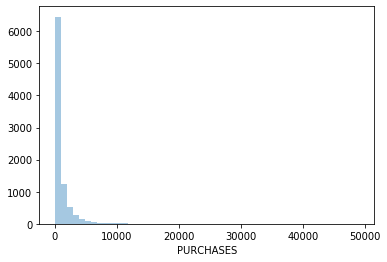

In [107]:
sns.distplot(data['PURCHASES'], kde=False)

### Credit Limit Distribution of Customers


In [0]:
data['CREDIT_LIMIT']=data['CREDIT_LIMIT'].fillna(0)

In [109]:
data['CREDIT_LIMIT'].describe(np.arange(0.1, 1, 0.1))

count     8950.000000
mean      4493.947277
std       3638.922543
min          0.000000
10%       1200.000000
20%       1500.000000
30%       2000.000000
40%       2500.000000
50%       3000.000000
60%       4200.000000
70%       6000.000000
80%       7000.000000
90%       9500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64

The credit limit ranges from 50 to 30000 and has a mean of 4493

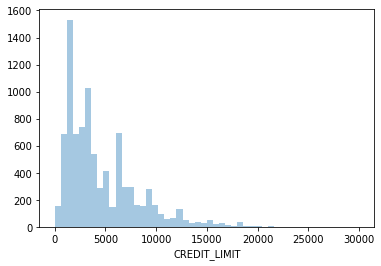

In [110]:
sns.distplot(data['CREDIT_LIMIT'], kde=False)

# Clustering

The number of transactions ranges from 0 to 358 and has a mean of 14

In [0]:
from sklearn.cluster import KMeans

In [112]:
# Get features we need
features = ['CREDIT_LIMIT', 'PURCHASES_TRX', 'PURCHASES']
X = data[features]

X.head()

,CREDIT_LIMIT,PURCHASES_TRX,PURCHASES
0,1000.0,2,95.40
1,7000.0,0,0.00
2,7500.0,12,773.17
3,7500.0,1,1499.00
4,1200.0,1,16.00


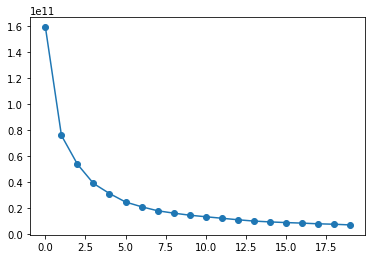

In [113]:
# get the sum of squared errors and find where the reduction of the errors are saturated with the increase of k
squared_errors = []

for num_iter in range(1,21):
  km = KMeans(n_clusters=num_iter, random_state=42)
  km.fit(X)
  squared_errors.append(km.inertia_)

# check for the best k to use
plt.plot(squared_errors, marker = 'o')

Use *k=5*.

In [0]:
# Clustering using KMeans. We choose 5 clusters
km = KMeans(n_clusters = 5, random_state = 42)

# Fit data to model
km.fit(X)

# Get labels
labels = km.predict(X)

# Create new dataframe with features and labels
new_data = X.copy()

# Add labels to new_data dataframe
new_data['labels'] = labels

In [115]:
new_data.describe()

,CREDIT_LIMIT,PURCHASES_TRX,PURCHASES,labels
count,8950.000000,8950.000000,8950.000000,8950.000000
mean,4493.947277,14.709832,1003.204834,1.277207
std,3638.922543,24.857649,2136.634782,1.754621
min,0.000000,0.000000,0.000000,0.000000
25%,1600.000000,1.000000,39.635000,0.000000
50%,3000.000000,7.000000,361.280000,0.000000
75%,6500.000000,17.000000,1110.130000,4.000000
max,30000.000000,358.000000,49039.570000,4.000000


# Deep Dive to each cluster

*Low Credit and Low Spending Users*

Low Credit, Low Purchase Number & Low Purchase Amount

In [121]:
# Cluster 0
cluster_0 = new_data[new_data['labels']==0]
cluster_0.describe()

,CREDIT_LIMIT,PURCHASES_TRX,PURCHASES,labels
count,5373.000000,5373.000000,5373.000000,5373.0
mean,2133.544988,9.856133,537.661686,0.0
std,997.191207,14.096570,780.407207,0.0
min,0.000000,0.000000,0.000000,0.0
25%,1200.000000,0.000000,0.000000,0.0
50%,2000.000000,6.000000,252.000000,0.0
75%,3000.000000,12.000000,689.670000,0.0
max,4350.000000,186.000000,6661.250000,0.0


*Rich but low spending customers (May be using other credit cards, offer discounts that others don't have)* 

High Credit, Average Purchase Number & Low Purchase Amount

In [117]:
# Cluster 1 
cluster_1 = new_data[new_data['labels']==1]
cluster_1.describe()

,CREDIT_LIMIT,PURCHASES_TRX,PURCHASES,labels
count,735.000000,735.000000,735.000000,735.0
mean,12806.054422,19.663946,1379.781116,1.0
std,2804.171804,26.598385,1723.410910,0.0
min,9950.000000,0.000000,0.000000,1.0
25%,10500.000000,1.000000,110.820000,1.0
50%,12000.000000,10.000000,717.920000,1.0
75%,14500.000000,27.000000,1973.105000,1.0
max,30000.000000,216.000000,10410.490000,1.0


*High Spending Customers (Offer higher credit limit)*

Average Credit, High Purchase Number & High Purchase Amount

In [118]:
# Cluster 2
cluster_2 = new_data[new_data['labels']==2]
cluster_2.describe()

,CREDIT_LIMIT,PURCHASES_TRX,PURCHASES,labels
count,324.000000,324.000000,324.000000,324.0
mean,8265.895062,75.515432,6749.877994,2.0
std,2826.253874,56.022964,2690.553577,0.0
min,1000.000000,4.000000,3393.250000,2.0
25%,6425.000000,39.750000,4700.992500,2.0
50%,8000.000000,61.500000,5842.060000,2.0
75%,10000.000000,100.250000,8288.807500,2.0
max,18000.000000,347.000000,15704.040000,2.0


*Valued Customers (Offer rewards and discounts)* 

High Credit, High Purchase Number & High Purchase Amount

In [119]:
# Cluster 3
cluster_3 = new_data[new_data['labels']==3]
cluster_3.describe()

,CREDIT_LIMIT,PURCHASES_TRX,PURCHASES,labels
count,24.000000,24.000000,24.000000,24.0
mean,16333.333333,123.375000,27690.865833,3.0
std,5745.823940,90.941363,8068.491163,0.0
min,7500.000000,3.000000,17409.210000,3.0
25%,12000.000000,66.500000,22078.815000,3.0
50%,17000.000000,99.500000,26008.730000,3.0
75%,18000.000000,161.500000,31609.457500,3.0
max,30000.000000,358.000000,49039.570000,3.0


*Average Customer (Offer discounts to make them spend more)*

Average Credit, Average Purchase Number & Low Purchase Amount

In [120]:
# Cluster 4
cluster_4 = new_data[new_data['labels']==4]
cluster_4.describe()

,CREDIT_LIMIT,PURCHASES_TRX,PURCHASES,labels
count,2494.000000,2494.000000,2494.000000,2494.0
mean,6525.537654,14.761427,891.798978,4.0
std,1425.009618,21.128502,996.102347,0.0
min,4200.000000,0.000000,0.000000,4.0
25%,5000.000000,1.000000,63.280000,4.0
50%,6500.000000,8.000000,502.940000,4.0
75%,7500.000000,21.000000,1394.405000,4.0
max,9700.000000,254.000000,4587.210000,4.0
